# Discovering knowledge in customer shopping behaviors
### Course: DAMI330484_22_2_01
### Instructor: M.Sc. Nguyen Van Thanh
| Group 19         |          |
|:-----------------|:---------|
| Đỗ Hoàng Thịnh   | 20133122 |
| Nguyễn Minh Tiến | 20133093 |
| Huỳnh Nguyễn Tín | 20133094 |
| Bùi Lê Hải Triều | 20133101 |

### 1. Dataset
Nhóm sử dụng tập dữ liệu chứa thông tin giao dịch của khách hàng từ 10 trung tâm mua sắm lớn tại đất nước Istanbul, từ năm 2021 đến thời điểm hiện tại năm 2023 trên [Kaggle](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset). Ngoài thông tin giao dịch, tập dữ liệu cũng cung cấp thông tin về độ tuổi, giới tính, phù hợp với nghiệp vụ khai phá.

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

In [119]:
transactions = pd.read_csv("D:/Data Mining/transactions.csv")
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Tập dữ liệu có 99457 giao dịch và 10 cột.

| Attribute      | Description                       | Example                       | Data type   |
|:---------------|:----------------------------------|:------------------------------|:------------|
| invoice_no     | Mã giao dịch                      | I138884                       | Categorical |
| customer_id    | Mã khách hàng                     | C241288                       | Categorical |
| gender         | Giới tính                         | Male, Female                  | Categorical |
| age            | Độ tuổi                           | 18, 69                        | Numerical   |
| category       | Danh mục sản phẩm                 | Clothing                      | Categorical |
| quantity       | Số lượng sản phẩm trong giao dịch | 1, 5                          | Numerical   |
| price          | Đơn giá sản phẩm trong giao dịch  | 1500.4                        | Numerical   |
| payment_method | Phương thức thanh toán            | Cash, Credit Card, Debit Card | Categorical |
| invoice_date   | Ngày diễn ra giao dịch            | 5/8/2022                      | Categorical |
| shopping_mall  | Địa điểm diễn ra giao dịch        | Kanyon                        | Categorical |

In [120]:
transactions.sample(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
24913,I123479,C309340,Female,57,Cosmetics,4,162.64,Debit Card,26/10/2022,Metrocity
98084,I187012,C167062,Female,45,Clothing,4,1200.32,Cash,14/04/2021,Zorlu Center
94712,I779538,C277115,Female,48,Clothing,5,1500.40,Credit Card,4/3/2021,Mall of Istanbul
8483,I157698,C336305,Male,60,Clothing,5,1500.40,Cash,6/12/2022,Istinye Park
7814,I141637,C282324,Female,22,Technology,2,2100.00,Cash,13/03/2021,Mall of Istanbul


In [121]:
transactions.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [122]:
transactions.duplicated().sum()

0

Tập dữ liệu không chứa giá trị null ở bất kỳ cột nào và không có giao dịch trùng lặp.

### 2. Data preparation
Để phục vụ việc khai phá về sau, nhóm sẽ tạo cột mới chứa thông tin tổng số tiền thanh toán trên mỗi giao dịch.

In [123]:
transactions['total'] = transactions['quantity'] * transactions['price']
transactions.sample(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total
90900,I234250,C109602,Male,24,Cosmetics,2,81.32,Cash,23/09/2022,Kanyon,162.64
49566,I275572,C319214,Male,35,Clothing,1,300.08,Credit Card,3/9/2021,Istinye Park,300.08
28360,I844075,C245554,Female,50,Clothing,1,300.08,Debit Card,13/10/2022,Zorlu Center,300.08
88750,I271666,C314112,Male,66,Food & Beverage,5,26.15,Cash,12/11/2021,Mall of Istanbul,130.75
33465,I461475,C232789,Female,61,Clothing,1,300.08,Debit Card,14/04/2022,Kanyon,300.08


Nhóm cũng sẽ thực hiện nhóm tuổi khách hàng thành 6 khung tuổi để giảm độ nhiễu của tập dữ liệu: 18 đến 24, 25 đến 34, 35 đến 44, 45 đến 54, 55 đến 64, và 65 đến 70.

In [124]:
bins = [18, 24, 34, 44, 54, 64, 70]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70']
transactions['age_group'] = pd.cut(transactions['age'], bins=bins, labels=labels)
age_group_type = pd.CategoricalDtype(labels, ordered=True)
transactions['age_group'] = transactions['age_group'].astype(age_group_type)
Kmeans_df=transactions
#transactions.drop('age', axis=1, inplace=True)
transactions.sample(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total,age_group
1538,I956543,C121976,Female,65,Cosmetics,4,162.64,Credit Card,30/08/2021,Forum Istanbul,650.56,65-70
3320,I305102,C626142,Male,44,Technology,5,5250.00,Credit Card,15/04/2021,Mall of Istanbul,26250.00,35-44
71053,I130933,C324940,Female,33,Shoes,1,600.17,Cash,11/6/2021,Kanyon,600.17,25-34
69129,I199524,C428227,Female,60,Cosmetics,5,203.30,Debit Card,20/12/2021,Zorlu Center,1016.50,55-64
64876,I317703,C162625,Female,63,Clothing,5,1500.40,Cash,28/09/2021,Kanyon,7502.00,55-64


Nhóm có thể giảm lượng dữ liệu qua việc loại bỏ cột không mang ý nghĩa khai phá như mã giao dịch và mã khách hàng.

In [125]:
transactions.duplicated(subset=['invoice_no']).any()

False

In [126]:
transactions.duplicated(subset=['customer_id']).any()

False

Tập dữ liệu không có giao dịch với cùng mã giao dịch hoặc cùng mã khách hàng. Điều này có nghĩa mỗi khách hàng chỉ thực hiện giao dịch một lần. Vì vậy, nhóm có thể loại bỏ hai cột này.

In [127]:
transactions.drop(['invoice_no', 'customer_id'], axis=1, inplace=True)
transactions.sample(5)

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total,age_group
22759,Female,34,Food & Beverage,1,5.23,Cash,10/6/2021,Mall of Istanbul,5.23,25-34
69215,Female,34,Toys,3,107.52,Credit Card,2/8/2022,Zorlu Center,322.56,25-34
76442,Female,68,Cosmetics,5,203.30,Cash,20/02/2022,Mall of Istanbul,1016.50,65-70
92550,Female,59,Clothing,2,600.16,Credit Card,14/01/2021,Kanyon,1200.32,55-64
30765,Male,18,Clothing,1,300.08,Credit Card,20/11/2021,Mall of Istanbul,300.08,NaN


Kiểm tra số lượng giao dịch trùng lặp sau khi loại bỏ hai cột trên.

In [128]:
transactions.duplicated().sum()

147

In [129]:
transactions.drop_duplicates(keep='first')

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total,age_group
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,25-34
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,18-24
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,18-24
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,65-70
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,45-54
...,...,...,...,...,...,...,...,...,...,...
99452,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25,45-54
99453,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92,25-34
99454,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92,55-64
99455,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00,55-64


### 3. EDA
Trước khi thực hiện việc khai phá dữ liệu, nhóm sẽ thực hiện phân tích sơ bộ tập dữ liệu hiện tại thông qua biểu đồ trực quan để hiểu hơn về nghiệp vụ trước khi thực hiện khai phá.

In [130]:
import seaborn as sns
import plotly.express as px

#### 3.1. Category wise
Đầu tiên, danh mục sản phẩm phổ biến nhất trên tổng số lượng sản phẩm trong mỗi giao dịch.

In [131]:
category = transactions.groupby('category')['quantity'].sum()
category = pd.DataFrame({'category': category.index, 'quantity': category.values})
category['categories'] = 'categories'

fig = px.treemap(category, path=['categories', 'category'], values='quantity', color='quantity',
                 hover_data=['category'], color_continuous_scale='Blues')
fig.update_layout(width=1000, height=600, paper_bgcolor='LightSteelBlue')
fig.show()

Như vậy, sản phẩm thuộc danh mục Clothing, Cosmetics, và Food & Beverage xuất hiện nhiều nhất trong toàn bộ số giao dịch.

#### 3.2. Gender wise
Đáng lưu ý, Clothing và Cosmetics là hai danh mục sản phẩm trên thực tế thường được mua bởi phụ nữ, nên có thể số lượng khách hàng nữ cao hơn nam.

In [132]:
transactions['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

Với số lượng khách hàng nữ cao hơn gần 20000, doanh thu có thể phần lớn đến từ khách hàng nữ.

In [133]:
gender = transactions.groupby('gender')['total'].sum()
gender = pd.DataFrame({'gender': gender.index, 'total': gender.values})

fig = px.pie(gender, values='total', names='gender')
fig.update_layout(paper_bgcolor='LightSteelBlue')
fig.show()

Đúng như dự đoán, gần 60% doanh thu đến từ khách hàng nữ.

In [134]:
gender_category = transactions.groupby(['gender', 'category'])['total'].sum().unstack().reset_index()

fig = px.bar(gender_category,
             x=['Books', 'Clothing', 'Cosmetics', 'Food & Beverage', 'Shoes', 'Souvenir', 'Technology', 'Toys'],
             y='gender')
fig.update_layout(width=1000, height=600, plot_bgcolor='LightSteelBlue', paper_bgcolor='LightSteelBlue',
                  legend=dict(title='category'))
fig.show()

Với mỗi danh mục sản phẩm, khách hàng nữ đều chi nhiều hơn khách hàng nam khi mua sắm. Tuy nhiên, đây cũng có thể là vì số lượng khách hàng nữ cao hơn.
Vì vậy, nhóm không thể dựa vào biểu đồ trực quan như trên để đưa ra quyết định nghiệp vụ marketing hoặc xây dựng hệ thống recommendation. Thay vào đó, để đưa ra chiến lược nhằm duy trì mối quan hệ khách hàng chính xác và hiệu quả, nhóm cần thực hiện quá trình khai phá dữ liệu.

### 4. Data mining
Mục tiêu chính của nhóm là xác định phân khúc khách hàng thân thiết hoặc sản phẩm có giá trị doanh nghiệp cao dựa trên thuật toán phân cụm (Clustering) và phân loại (Classification). Ngoài ra, thuật toán kết hợp (Associate) cũng sẽ được sử dụng để phân tích hành vi mua hàng của khách hàng và xu hướng, khuôn mẫu có ích cho quyết định nghiệp vụ.

#### 4.1. Clustering

Thuật toán Clustering là một loại của nhóm thuật toán Unsupervised Learning. 
Trong đó các dữ liệu ban đầu được phân thành cụm dựa trên vị trí tương đối của chúng so với nhau.

K-Means Clustering là thuật toán Machine Learning phổ biến để phân cụm dữ liệu.

In [135]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [136]:
df_new=Kmeans_df[['age','total']]

#### 4.1.1 Outliers Removal
Loại bỏ các outlier của cột total

Text(0.5, 0, 'Attributes')

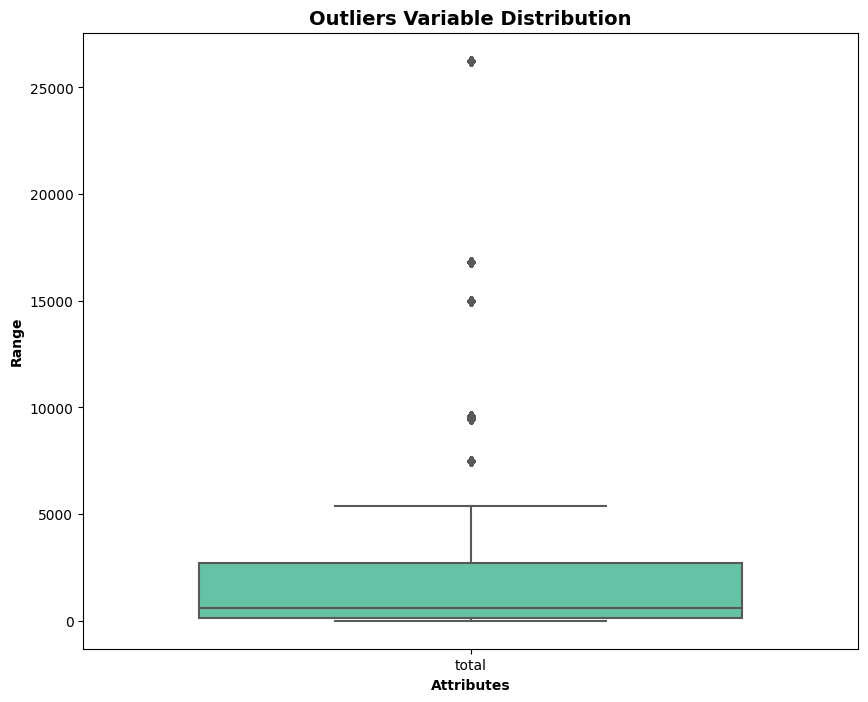

In [137]:
attributes = ['total']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_new[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
#setting các tiêu đề, font chữ và tên cột x,y
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [138]:
#loại bỏ outliers ở cột total
Q1 = df_new.total.quantile(0.05) #xác định tứ phân vị đầu
Q3 = df_new.total.quantile(0.95) #xác định tứ phân vị thứ 3
IQR = Q3 - Q1 #tính IQR
df_new = df_new[(df_new.total >= Q1 - 1.5*IQR) & (df_new.total <= Q3 + 1.5*IQR)] 
#loại bỏ các giá trị ở cột total mà bé hơn giá trị biên dưới và lớn hơn biên trên

#### 4.1.2 Scaling Data

In [139]:
# Select the age and amount columns
df_scaled = df_new[['age', 'total']]


# Scale the age and amount columns using min-max scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=['age', 'total'])



df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['age','total']
df_scaled.head()

,age,total
0,0.196078,0.446375
1,0.058824,0.321308
2,0.039216,0.017556
3,0.941176,0.893077
4,0.686275,0.014122


#### 4.1.3 Build K means Model with random K number

In [140]:

kmeans = KMeans(n_clusters=5, max_iter=50) #Khởi tạo Kmeans với số cụm là 5 và số lần lặp tối đa là 50

kmeans.fit(df_scaled) #hàm fit sẽ thực hiện training data trong df_scaled

kmeans.labels_


array([2, 3, 3, ..., 1, 4, 0])

#### 4.1.4 Find the optimal K number
Theo 2 phương pháp:

    1. Elbow curve
    
    2. Silhoutte Score

##### Elbow curve
Phương pháp này bao gồm việc vẽ đường cong giải thích phương sai dưới dạng hàm số của số lượng cụm và chọn khuỷu tay của đường cong là số lượng cụm tối ưu.

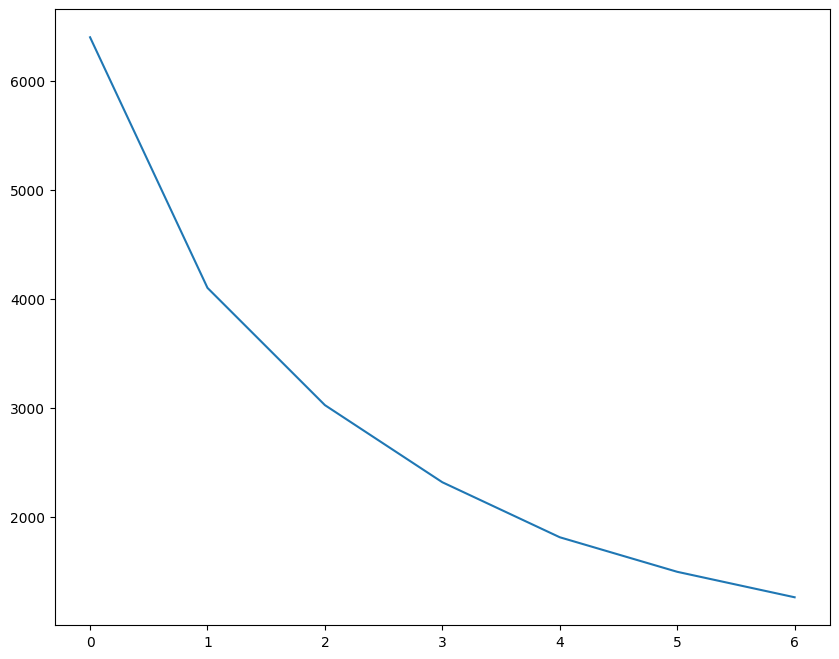

In [141]:
ssd = [] # khởi tạo danh sách trống để lưu trữ các  tổng bình phương khoảng cách (sum of squared distance) cho mỗi giá trị k khác nhau
range_n_clusters = [2, 3, 4, 5, 6, 7, 8] #khởi tạo các giá trị cho K cluster
for num_clusters in range_n_clusters: # vòng lặp với mỗi giá trị k từ 2 đến 8
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_) #hàm inertia tính tổng bình phương khoảng cách của mô hình vừa train 
    
# Biểu diễn các giá trị ssd theo Elbow Curve
plt.plot(ssd)

##### Silhoutte Score
Silhouette score là một phương pháp đánh giá hiệu quả của thuật toán phân cụm. Nó sử dụng độ gọn của các cụm riêng lẻ (khoảng cách trong cụm) và sự tách biệt giữa các cụm (khoảng cách giữa các cụm) để đo lường một điểm số đại diện tổng thể về hiệu suất của thuật toán phân cụm.


Điểm Silhouette được tính bằng cách lấy hệ số Silhouette trung bình (MSC) trên tất cả các điểm dữ liệu. MSC là một thước đo độ tốt của việc gán mỗi điểm dữ liệu vào cụm được gán của nó, với giá trị cao hơn cho biết việc phân cụm tốt hơn. MSC được tính bằng cách so sánh khoảng cách trong cụm (a) và khoảng cách giữa các cụm (b) cho mỗi điểm dữ liệu. MSC được định nghĩa như sau:

MSC = (b - a) / max(a, b)

trong đó a là độ khác biệt trung bình của điểm dữ liệu với tất cả các điểm khác trong cùng một cụm, và b là độ khác biệt trung bình của điểm dữ liệu với tất cả các điểm trong cụm gần nhất

In [142]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6]
#tạo vòng lặp thực hiện tính điểm trung bình Silhouette của từng lần thực thi thuật toán Kmeans cùng số K cluster tương ứng
for num_clusters in range_n_clusters:
    
    # khởi tạo kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=30)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_ #gán mảng giá trị cluster tương ứng 
    
    # silhouette score
    silhouette_avg_ = silhouette_score(df_scaled, cluster_labels) #thực hiện tính điểm trung bình Silhouette trong dataframe df_scaled với số cụm được truyền vào
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg_))

For n_clusters=2, the silhouette score is 0.4721108234325241
For n_clusters=3, the silhouette score is 0.5040912376013137
For n_clusters=4, the silhouette score is 0.43623872125719537
For n_clusters=5, the silhouette score is 0.4619227076843678
For n_clusters=6, the silhouette score is 0.48378754912942773


#### 4.1.5 Build Model with optimal K number

In [143]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled)



# kết hợp tên cụm vào dataframe df_new, kmeans.labels gọi ra 1 mảng chứa tên cụm của từng khách hàng trong dataframe df_new
df_new['cluster'] = kmeans.labels_
df_new.head()

,age,total,cluster
0,28,7502.00,2
1,21,5401.53,0
2,20,300.08,0
3,66,15004.25,2
4,53,242.40,1


#### 4.1.6 Visualize Model

[Text(0.5, 1.0, 'Spectral Clustering')]

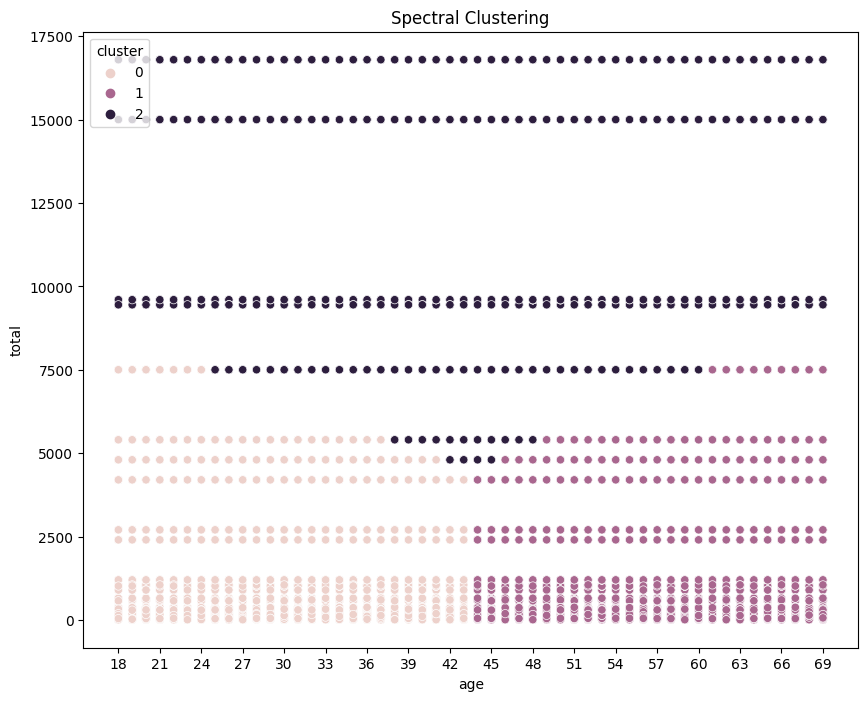

In [146]:
df_new = df_new.sort_values(by="age")
fig, ax = plt.subplots()
sns.scatterplot(x='age', y='total', data=df_new, hue='cluster', ax=ax)
plt.xticks(np.arange(min(df_new['age'].astype(int)),max(df_new['age'].astype(int))+1,step=3))
ax.set(title='Spectral Clustering')

**Kết luận**: Phân được 3 cụm 

**Cụm 1** là nhóm khách hàng trẻ tuổi, có thu nhập thấp hoặc tiết kiệm, không quan tâm nhiều đến mua sắm. Họ có thể là những người mới ra trường, sinh viên hoặc những người có lối sống giản dị.

**Cụm 2** là nhóm khách hàng trung niên hoặc cao tuổi, có thu nhập ổn định , quan tâm đến mua sắm nhưng không quá nhiều. Họ có thể là những người đã có gia đình, nghề nghiệp và sở thích riêng.

**Cụm 3** là nhóm khách hàng đa dạng về độ tuổi, có thu nhập từ vừa đến cao, quan tâm nhiều đến mua sắm. Họ có thể là những người thích theo kịp xu hướng, thể hiện cá tính và sở hữu những sản phẩm chất lượng.


**Vài phương án kích thích chi tiêu khách hàng theo từng cụm**:
-   Đối với cụm 1, có thể tạo ra những chương trình khuyến mãi, giảm giá, tặng quà hoặc điểm thưởng để kích thích họ mua sắm nhiều hơn. Ngoài ra, có thể tìm hiểu nhu cầu và sở thích của họ để đưa ra những sản phẩm phù hợp với túi tiền và gu thẩm mỹ của họ.

-   Đối với cụm 2, có thể tăng cường chất lượng dịch vụ, chăm sóc khách hàng và bảo hành sản phẩm để tạo ra sự tin tưởng và trung thành của họ. Ngoài ra, có thể giới thiệu những sản phẩm mới, độc đáo hoặc cao cấp để thu hút sự chú ý và thỏa mãn nhu cầu của họ.

-   Đối với cụm 3, có thể tận dụng các kênh truyền thông, quảng cáo và marketing để nâng cao nhận diện thương hiệu và tạo ra sự lan tỏa của sản phẩm. Ngoài ra, có thể tạo ra những trải nghiệm mua sắm đặc biệt, cá nhân hóa hoặc tương tác để tăng sự hài lòng và gắn bó của họ.

In [161]:
df_filtered1 = df_new[df_new["cluster"] == 0]

# Print the filtered dataframe
df_filtered1.head(10)
#df_filtered.tail(10)

,age,total,cluster
21224,18,300.08,0
62086,18,896.00,0
61435,18,15.15,0
20884,18,162.64,0
8333,18,46.92,0
20895,18,322.56,0
84471,18,7502.00,0
84486,18,322.56,0
84496,18,1016.50,0
84508,18,2700.72,0


In [162]:
df_filtered2 = df_new[df_new["cluster"] == 1]

# Print the filtered dataframe
df_filtered2.head(10)

,age,total,cluster
32926,44,35.84,1
27611,44,1200.32,1
68864,44,187.68,1
23738,44,47.07,1
58312,44,293.25,1
35326,44,40.66,1
27610,44,20.92,1
27498,44,46.92,1
21239,44,1200.32,1
49731,44,650.56,1


In [163]:
df_filtered3 = df_new[df_new["cluster"] == 2]

# Print the filtered dataframe
df_filtered3.head(10)

,age,total,cluster
67457,18,15004.25,2
21009,18,9602.72,2
35677,18,9602.72,2
77672,18,9602.72,2
73725,18,9602.72,2
83878,18,15004.25,2
8678,18,9602.72,2
60628,18,9602.72,2
22670,18,16800.00,2
62199,18,15004.25,2
